### Loading Libraries

In [1]:
# Data manipulation
import pandas as pd 
import numpy as np
# Data visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import seaborn as sns

### Data Source

https://www.kaggle.com/tayoaki/kickstarter-dataset

### 1. Loading the DataSet

In [2]:
df = pd.read_csv('18k_Projects.csv', low_memory=False)

In [3]:
df = df.drop(columns =['Id','Name','Url','Creator','Latitude','Longitude','Location',\
            'Start Timestamp (UTC)','End Timestamp (UTC)','Creator - # Projects Created',\
            'Creator - # Projects Backed','Creator Bio','Creator Website'])

In [4]:
df.head()

,State,Currency,Top Category,Category,Updates,Comments,Rewards,Goal,Pledged,Backers,...,Duration in Days,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,failed,USD,Art,Art,0,0,9,20000,6,2,...,30,Yes,272.0,70,Yes,0.0,2,297,153.0,0
1,failed,USD,Film & Video,Short Film,0,0,8,3000,180,5,...,33,Yes,573.0,57,Yes,0.0,0,276,98.0,0
2,failed,USD,Fashion,Fashion,1,2,17,5000,1941,62,...,30,No,NaN,158,No,0.0,12,1049,66.0,2
3,failed,USD,Publishing,Poetry,0,0,4,5000,130,5,...,60,Yes,1285.0,2,Yes,0.0,0,309,169.0,0
4,failed,USD,Publishing,Nonfiction,0,0,12,12000,1015,16,...,30,Yes,969.0,411,Yes,0.0,6,1636,216.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 22 columns):
State                             18142 non-null object
Currency                          18142 non-null object
Top Category                      18142 non-null object
Category                          18142 non-null object
Updates                           18142 non-null int64
Comments                          18142 non-null int64
Rewards                           18142 non-null int64
Goal                              18142 non-null int64
Pledged                           18142 non-null int64
Backers                           18142 non-null int64
Start                             18142 non-null object
End                               18142 non-null object
Duration in Days                  18142 non-null int64
Facebook Connected                18142 non-null object
Facebook Friends                  12290 non-null float64
Facebook Shares                   18142 non-null int64
Ha

In [6]:
df.isna().sum()

State                                0
Currency                             0
Top Category                         0
Category                             0
Updates                              0
Comments                             0
Rewards                              0
Goal                                 0
Pledged                              0
Backers                              0
Start                                0
End                                  0
Duration in Days                     0
Facebook Connected                   0
Facebook Friends                  5852
Facebook Shares                      0
Has Video                            0
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               0
dtype: int64

### 2. Data Wrangling

In [7]:
# Parsing Dates(years 2013 - 2014)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [8]:
# Deleting currencies other than $
len(df[df['Currency'] != 'USD'])
len(df[df['Currency'] == 'USD'])

df = df[df['Currency'] == 'USD']

In [9]:
# Deleting outliers for Goal variable
df = df[df['Goal'] <= 30000]

In [10]:
len(df)

12681

### 3. Visualizing Breakdown of the results

In [11]:
fail_succ = round(df['State'].value_counts(normalize=True)*100,0).to_frame().reset_index()

fail_succ 

,index,State
0,successful,54.0
1,failed,46.0


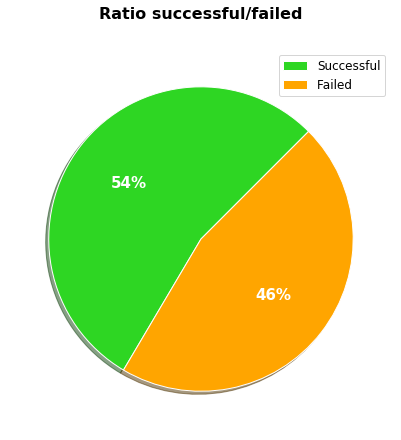

In [12]:
fig, ax = plt.subplots(figsize = (9,7))
plt.pie(fail_succ['State'],autopct ='%.f%%',textprops = {'fontsize': 15, 'color':'white','fontweight':'bold' },\
        shadow = True, startangle=45,\
        wedgeprops = { 'linewidth' : 1,'edgecolor' : "white" }, colors =['#2ED623','#FFA500'])
plt.gca().legend(['Successful','Failed'], loc = 1,prop = {'size': 12});

plt.title("Ratio successful/failed", fontsize = 16,fontweight = 'bold',pad = 35,\
        loc = 'center', horizontalalignment = 'center', verticalalignment ='center');


### Campaign results analysis : % of goal funded

In [13]:
df['% of goal funded'] = df['Pledged']/df['Goal']*100

In [14]:
df['% of goal funded'].describe()

count    12681.000000
mean       111.565389
std        290.506273
min          0.003333
25%          8.000000
50%        100.666667
75%        118.440000
max      13263.700000
Name: % of goal funded, dtype: float64

### Average % of goal funded according to the final state of the campaign

In [15]:
perc_obj = df.groupby('State')['% of goal funded'].mean().to_frame().reset_index()

perc_obj['%'] = round(perc_obj['% of goal funded']/100, 2)
perc_obj

,State,% of goal funded,%
0,failed,13.682620,0.14
1,successful,195.205199,1.95


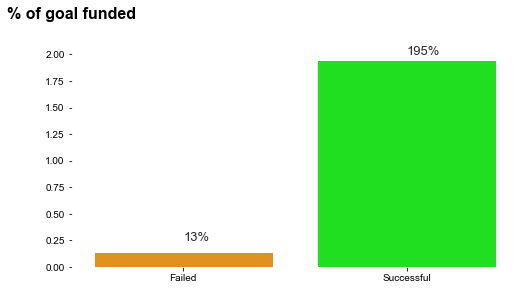

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(style='white')
sns.set_context("notebook")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

col = ['#FF9800','#00FF00']
g = sns.barplot(x ='State', y = '%', data=perc_obj, palette=col)
sns.despine()
pos = [0,1]
labels=['Failed','Successful']
plt.xticks(pos,labels)
g.xaxis.set_label_text("")
g.yaxis.set_label_text("")

g.spines['bottom'].set_color('white')
g.spines['left'].set_color('white')
g.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

style = dict(size=13)

g.text(0, 0.25, "13%",**style)
g.text(1, 2.00, "195%",**style);

plt.title("% of goal funded", fontsize=16,fontweight='bold',pad=35,\
        loc='left', horizontalalignment='center', verticalalignment='center');



## CAMPAIGN STRUCTURE Analysis

### 1. Relationship between Goal and Campaing Result

In [213]:
round(df['Goal'].describe())

count    12681.0
mean      7511.0
std       7367.0
min        100.0
25%       2000.0
50%       5000.0
75%      10000.0
max      30000.0
Name: Goal, dtype: float64

In [18]:
goal = pd.DataFrame(df.groupby('Goal').size().rename('Nb projects').reset_index())

goal = goal.sort_values('Nb projects',ascending=False)
goal['% nb projects'] = round(goal['Nb projects']/len(df)*100,2)

goal_10 =goal.head(10)

In [20]:
goal['Goal'].head(10)

332     5000
517    10000
244     3000
190     2000
611    15000
106     1000
216     2500
665    20000
142     1500
704    25000
Name: Goal, dtype: int64

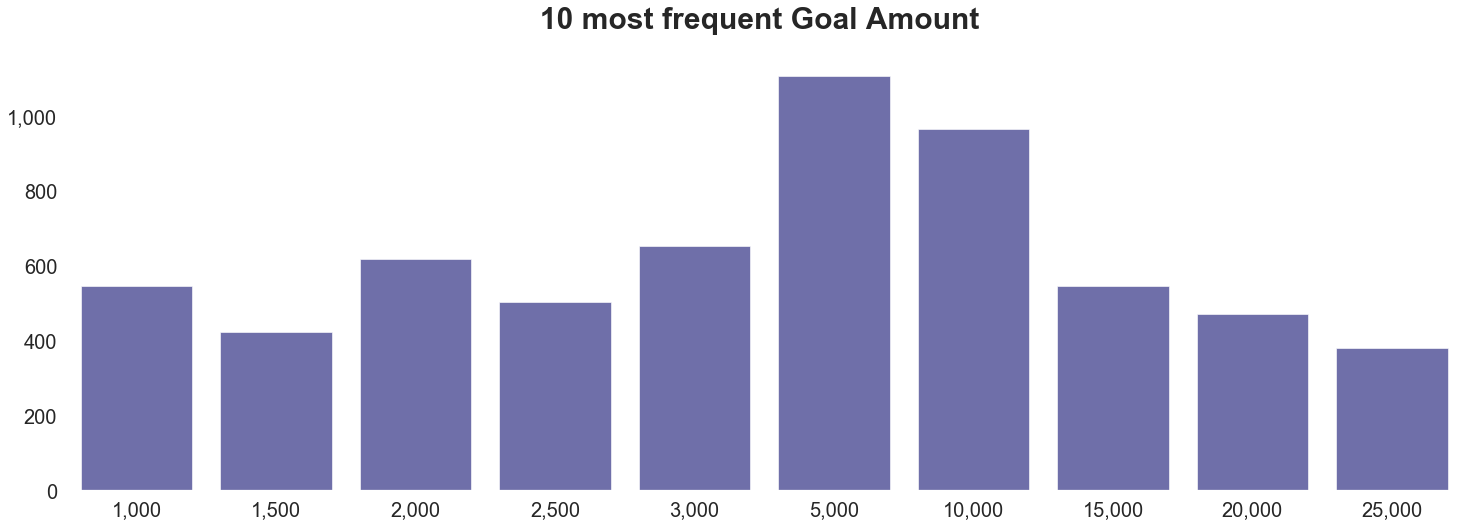

In [32]:
# Most frequent goal amounts
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style='white')
sns.set_context("notebook")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
g = sns.barplot(x ='Goal', y = 'Nb projects', data=goal_10.sort_values(by = 'Nb projects',\
                                            ascending = False), color='navy', alpha = 0.6)
sns.despine(right=True, top=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("");


labels =['1,000', '1,500','2,000','2,500','3,000','5,000','10,000','15,000','20,000','25,000']
g.set_xticklabels(labels);

labels2 =['0','200','400' ,'600','800','1,000']
g.set_yticklabels(labels2);

plt.title("10 most frequent Goal Amount ", fontsize=30,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center', verticalalignment='center');



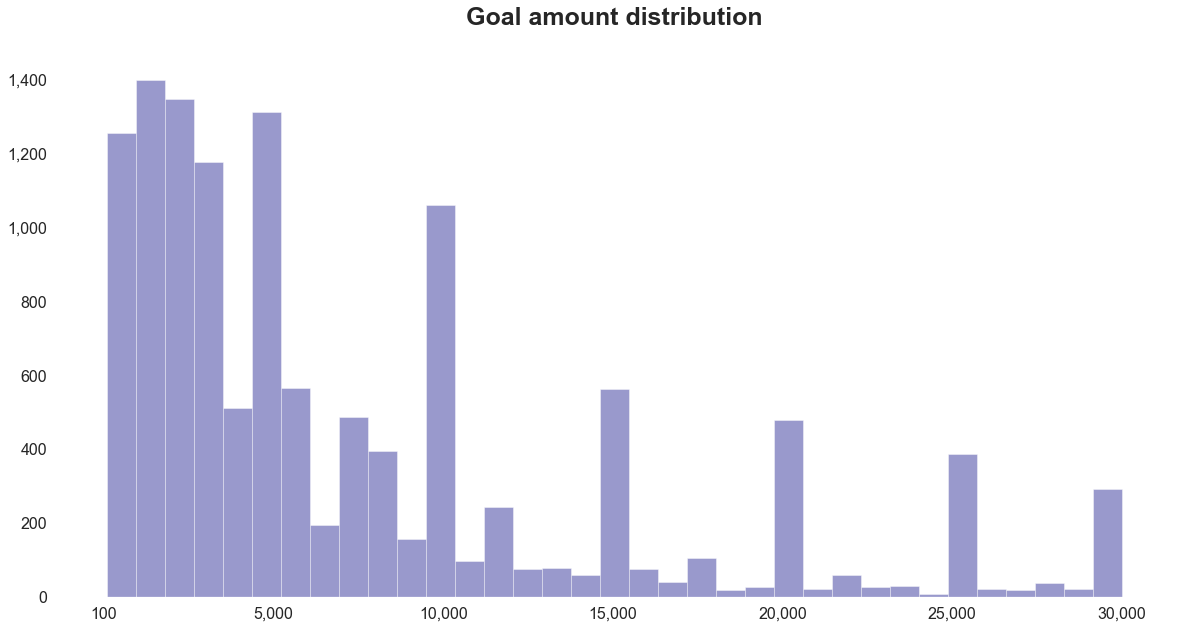

In [33]:
# Goal amount distribution within the whole dataset
plt.subplots(figsize=(20,10))
sns.set(style='white')
sns.set_context("notebook")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

g = sns.distplot(df['Goal'], kde = False, color="navy", bins = 35)

sns.despine(right=True, top=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

labels = ['0','100','5,000', '10,000', '15,000','20,000', '25,000', '30,000']
g.set_xticklabels(labels);

g.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
g.grid(False)
g.xaxis.set_label_text("")
g.yaxis.set_label_text("");

plt.title("Goal amount distribution", fontsize=25,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center', verticalalignment='center');


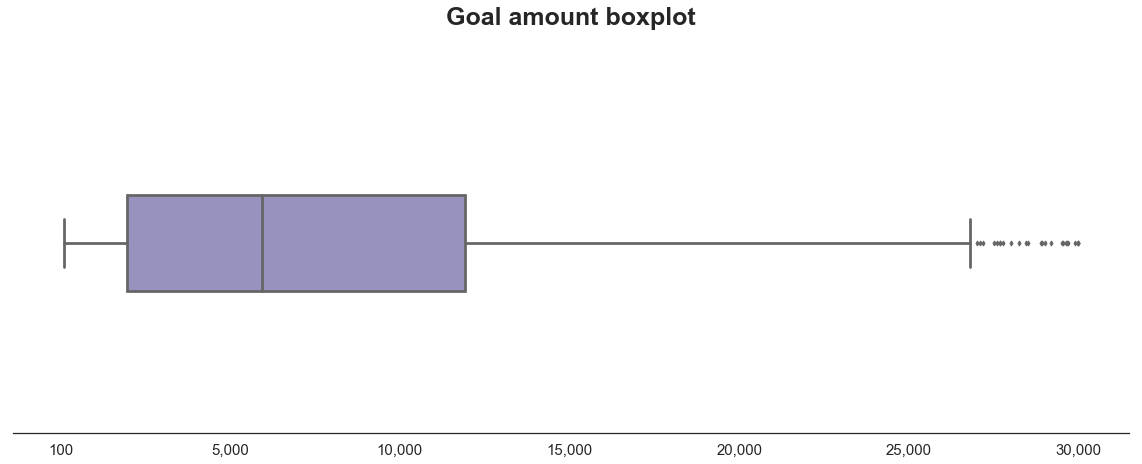

In [37]:
fig, ax = plt.subplots(figsize=(20,7))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left=True)
g = sns.boxplot(x="Goal", data = goal, width=0.25, linewidth=2.75, \
            fliersize=3.5, color = '#938BC6')
plt.xticks(fontsize=15)

labels = ['0','100','5,000', '10,000', '15,000','20,000', '25,000', '30,000']
g.set_xticklabels(labels);

g.xaxis.set_label_text("");

plt.title("Goal amount boxplot", fontsize=25,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center', verticalalignment='center');

In [25]:
# Goal distribution for failed projects
df.loc[df["State"]=="failed"]['Goal'].describe().round()

count     5843.0
mean      8794.0
std       7957.0
min        100.0
25%       2700.0
50%       6000.0
75%      12000.0
max      30000.0
Name: Goal, dtype: float64

In [26]:
# Goal distribution for successful projects
df.loc[df["State"]=="successful"]['Goal'].describe().round()

count     6838.0
mean      6414.0
std       6630.0
min        100.0
25%       1800.0
50%       4000.0
75%       9000.0
max      30000.0
Name: Goal, dtype: float64

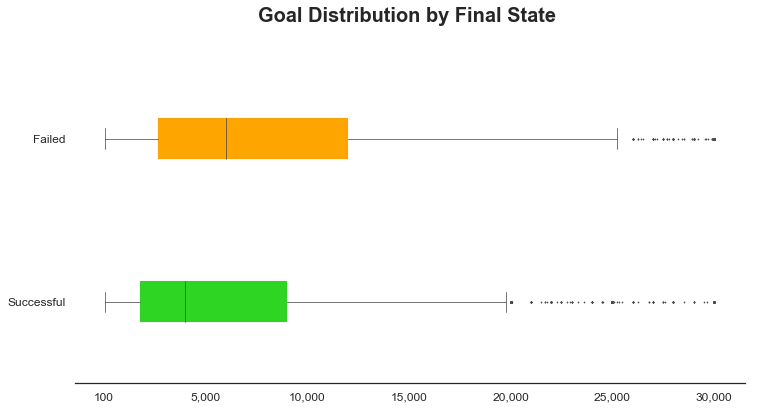

In [27]:
# Goal distribution by final state
fig, ax = plt.subplots(figsize=(12,6))
sns.set(style='white')
sns.set_context("notebook")

sns.despine(left = True)
g = sns.boxplot(x="Goal", y= "State",data = df, width=0.25, linewidth=0.75, \
            fliersize=0.85) 
            
failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 
 
succ.set_facecolor('#2ED623')
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

labels = ['0','100','5,000', '10,000', '15,000','20,000', '25,000', '30,000']
g.set_xticklabels(labels);

g.xaxis.set_label_text("")
g.yaxis.set_label_text("");

plt.title("Goal Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');

### 2. Relationship between Campaing Duration and Result

In [28]:
df['Duration in Days'].describe()

count    12681.000000
mean        30.962069
std          9.843815
min          1.000000
25%         29.000000
50%         30.000000
75%         31.000000
max         60.000000
Name: Duration in Days, dtype: float64

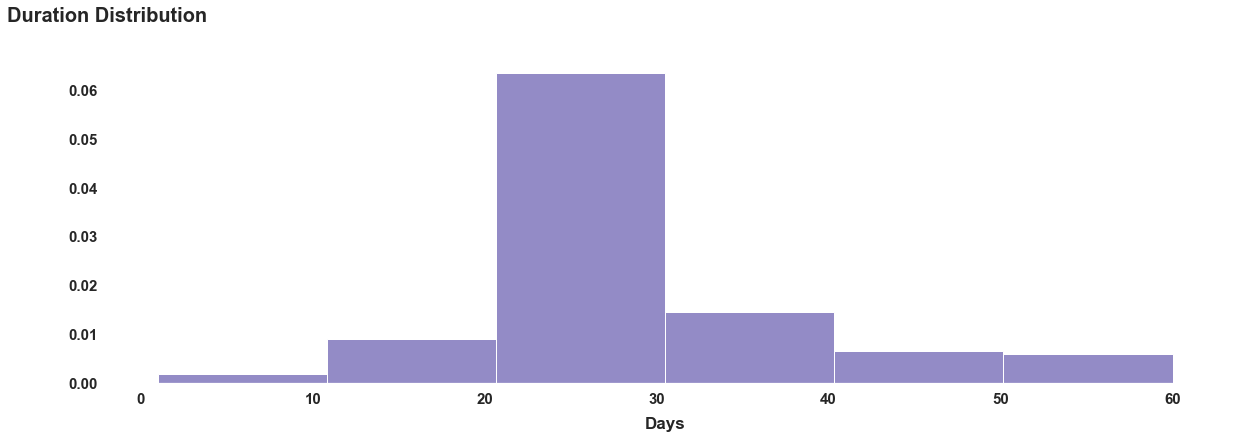

In [41]:
# Duration distribution within the whole dataset
fig, ax = plt.subplots(figsize=(20,6))
sns.set(style='white')
sns.set_context("notebook")
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.hist(df['Duration in Days'], density = True, bins = 6, color ='#938BC6');

sns.despine(right=True, top=True)
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.xlabel("Days", labelpad=10, fontsize = 17,fontweight='bold');

plt.title("Duration Distribution", fontsize=20,fontweight='bold',pad=35,\
        loc='left', horizontalalignment='center');

In [42]:
# duration distribution failed projects
duration_rates = df.loc[df["State"]=="failed"]['Duration in Days'].to_frame()

In [43]:
duration_rates.describe()

,Duration in Days
count,5843.000000
mean,32.329112
std,10.478554
min,1.000000
25%,29.000000
50%,30.000000
75%,32.000000
max,60.000000


In [44]:
# duration distribution successful projects
duration_succ = df.loc[df["State"]=="successful"]['Duration in Days'].to_frame()

In [45]:
duration_succ.describe()

,Duration in Days
count,6838.000000
mean,29.793946
std,9.106641
min,1.000000
25%,28.000000
50%,30.000000
75%,30.000000
max,60.000000


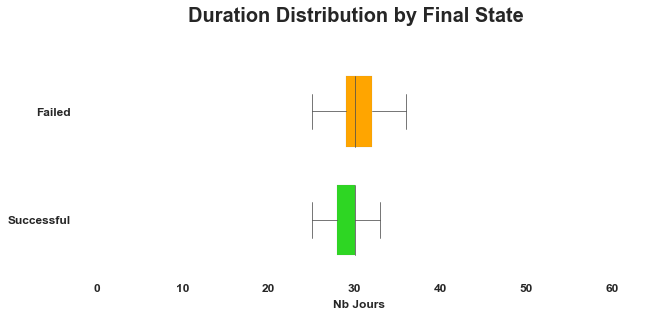

In [46]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left = True)
g = sns.boxplot(x="Duration in Days", y= "State",data = df, width=0.65, linewidth=0.75,\
                fliersize=0)


failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 

succ.set_facecolor('#2ED623')
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')


plt.xlabel("Nb Jours", labelpad=6, fontsize = 12, fontweight='bold');
g.yaxis.set_label_text("");
plt.title("Duration Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');


### 3. Relationship between project's Category and Campaing Result

In [47]:
perc_cat = round(df['Top Category'].value_counts()/len(df)*100,3).to_frame()
perc_cat

,Top Category
Music,17.830
Film & Video,17.065
Publishing,12.381
Games,7.917
Art,7.846
Design,7.405
Food,6.593
Fashion,5.812
Technology,3.856
Comics,3.596


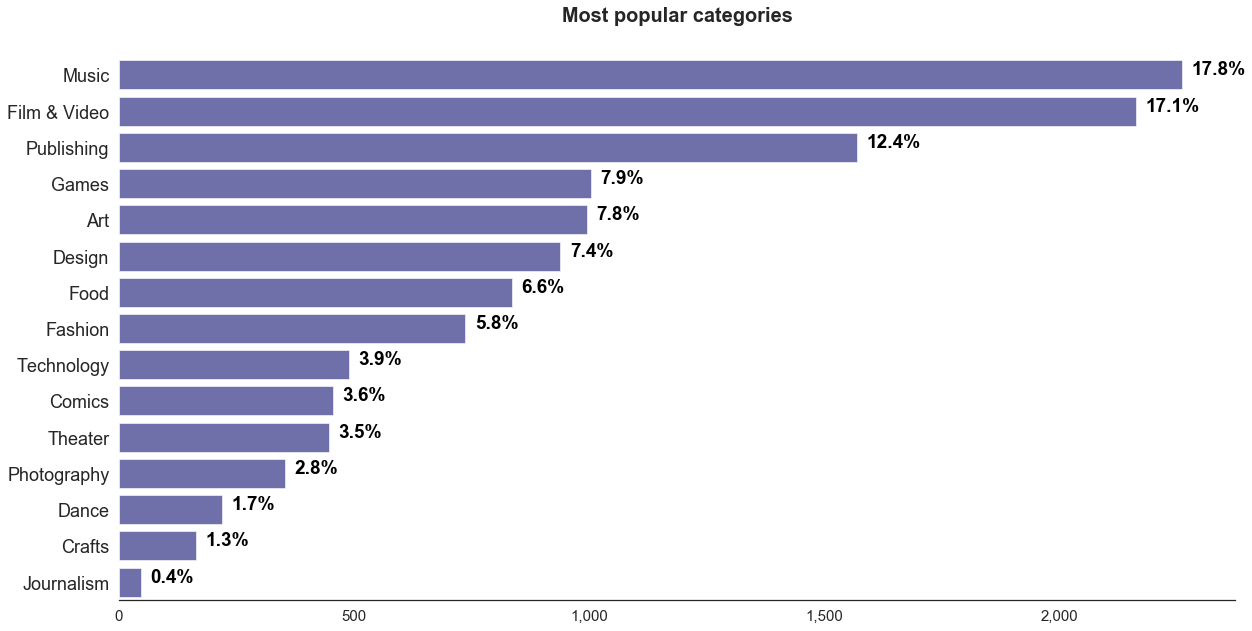

In [49]:
# Most popular categories
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style='white')
sns.set_context("notebook")
g = sns.countplot(y = df['Top Category'], color='navy',alpha = 0.6,order=df['Top Category'].value_counts().index)

sns.despine(left=True)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
plt.xticks(fontsize=15,)
plt.yticks(fontsize=18)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("");
plt.title("Most popular categories", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');


label =[17.83, 17.10, 12.38, 7.92, 7.85, 7.41, 6.59, 5.81, 3.86, 3.60, 3.53, 2.78,\
        1.73, 1.30, 0.40]


for i,p in enumerate(g.patches):
        percentage = '{:.1f}%'.format(label[i])
        x = p.get_x() + p.get_width() + 20
        y = p.get_y() + p.get_height()/2
        g.annotate(percentage, (x, y), size=19, color = 'black', fontweight='bold')

In [54]:
failed = df[df['State']=='failed']
failed_cat = failed.groupby('Top Category')['State'].value_counts().to_frame()

failed_cat = failed_cat.rename(columns={'Top Category':'category',\
                                      'State':'state', 'State':'nb'})
failed_cat.reset_index(inplace = True)

failed_cat.head()

,Top Category,State,nb
0,Art,failed,442
1,Comics,failed,176
2,Crafts,failed,95
3,Dance,failed,57
4,Design,failed,489


In [51]:
successful = df[df['State']=='successful']

successful_cat = successful.groupby('Top Category')['State'].value_counts().to_frame()


successful_cat = successful_cat.rename(columns={'Top Category':'category',\
                                      'State':'state', 'State':'nb'})
successful_cat.reset_index(inplace = True)

successful_cat.head()

,Top Category,State,nb
0,Art,successful,553
1,Comics,successful,280
2,Crafts,successful,69
3,Dance,successful,162
4,Design,successful,450


In [60]:
total = []
for i in range(15):
    total.append(successful_cat.iloc[i]['nb'] + failed_cat.iloc[i]['nb'])

successful_cat['total'] = total
failed_cat['total'] = total

In [61]:
failed_perc = []

for i in range(15):
    failed_perc.append(round(failed_cat.iloc[i]['nb']/failed_cat.iloc[i]['total']*100))

failed_cat['%'] = failed_perc

successfl_perc = []
for i in range(15):
    successfl_perc.append(round(successful_cat.iloc[i]['nb']/successful_cat.iloc[i]['total']*100))

successful_cat['%'] = successfl_perc

In [63]:
successful_cat.sort_values(by='%', ascending = False)

,Top Category,State,nb,total,%
3,Dance,successful,162,219,74.0
14,Theater,successful,323,447,72.0
10,Music,successful,1464,2261,65.0
1,Comics,successful,280,456,61.0
8,Games,successful,596,1004,59.0
6,Film & Video,successful,1250,2164,58.0
0,Art,successful,553,995,56.0
4,Design,successful,450,939,48.0
7,Food,successful,379,836,45.0
11,Photography,successful,152,353,43.0


In [65]:
# average successful rate for all categories
successful_cat['%'].mean()

52.2

In [66]:
perc_failed = np.array(failed_cat.iloc[:,4])
perc_succ = np.array(successful_cat.iloc[:,4])

categ = list(failed_cat.iloc[:,0])


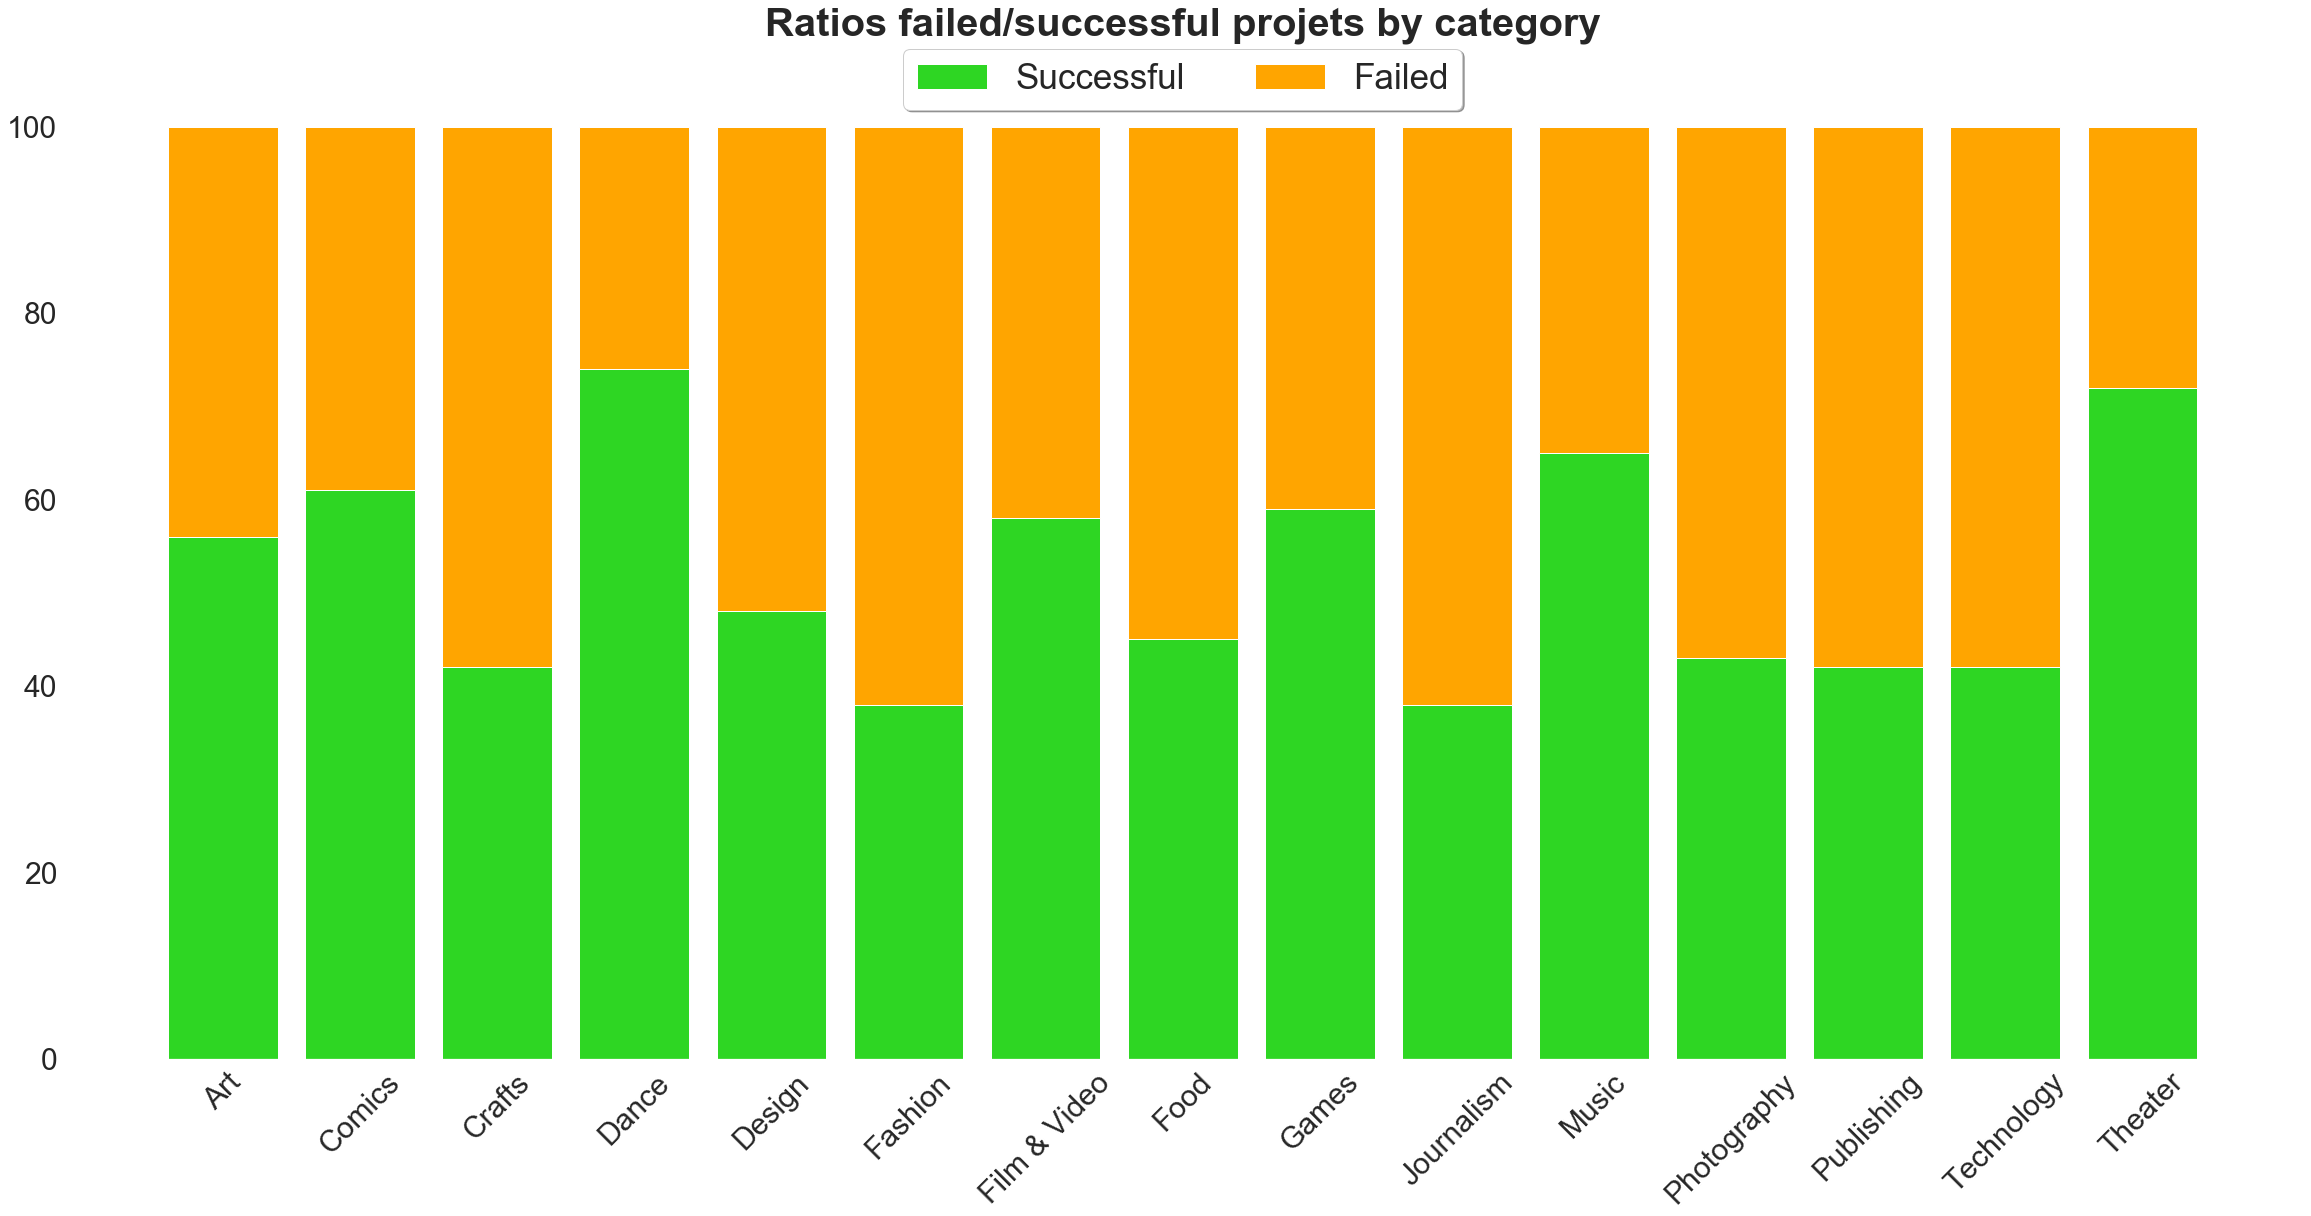

In [77]:
# Ratios failed/successful projets by category
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize = (40,18))
plt.bar(categ,perc_succ, align='center', color='#2ED623')
plt.bar(categ,perc_failed, bottom =perc_succ, align='center', color='#FFA500')
plt.grid(b=None)

plt.xticks(categ, rotation = 45)

plt.legend(['Successful','Failed'],loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=True, prop={'size': 35})

plt.xticks(fontsize=30)
plt.yticks(fontsize=30);

plt.title("Ratios failed/successful projets by category", fontsize=40,fontweight='bold',pad=45,\
        loc='center', horizontalalignment='center');


## COMMUNICATION Factor Analysis

### 1. Description's Length and final state relationship

In [64]:
df['# Words (Description)'].describe()

count    12681.000000
mean       615.751203
std        534.659264
min          3.000000
25%        263.000000
50%        456.000000
75%        796.000000
max       5140.000000
Name: # Words (Description), dtype: float64

In [78]:
# Description's length distribution failed projects
words_nb_failed = df.loc[df["State"]=="failed"]['# Words (Description)'].to_frame()
words_nb_failed.describe().round()

,# Words (Description)
count,5843.0
mean,539.0
std,495.0
min,3.0
25%,222.0
50%,387.0
75%,686.0
max,5140.0


In [79]:
# Description's length distribution successful projects
words_nb_succ = df.loc[df["State"]=="successful"]['# Words (Description)'].to_frame()
words_nb_succ.describe()

,# Words (Description)
count,6838.000000
mean,681.653115
std,558.164081
min,10.000000
25%,304.000000
50%,522.000000
75%,881.000000
max,4724.000000


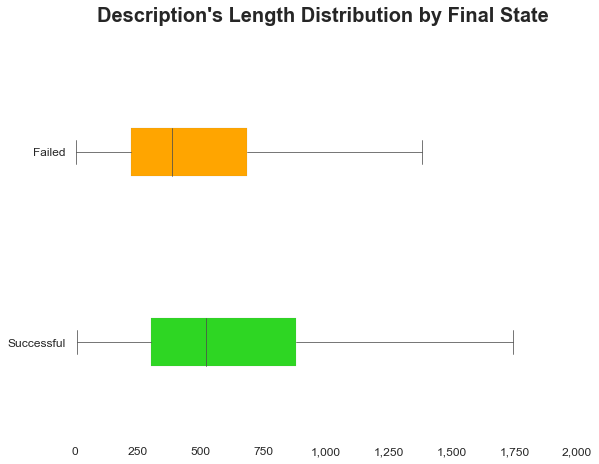

In [80]:
fig, ax = plt.subplots(figsize=(9,7))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left = True)
g = sns.boxplot(x="# Words (Description)", y= "State",data = df, width=0.25, linewidth=0.75, \
            fliersize=0)

g.axis(xmin=0, xmax=2000)

failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 

succ.set_facecolor('#2ED623') 
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("");

g.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

plt.title("Description's Length Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');

### 2. Number of Updates and final state relationship

In [68]:
df['Updates'].describe()

count    12681.000000
mean         3.303446
std          5.253603
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max        128.000000
Name: Updates, dtype: float64

In [69]:
# Number of updates distribution failed projects
df.loc[df["State"]=="failed"]['Updates'].describe().round()

count    5843.0
mean        1.0
std         3.0
min         0.0
25%         0.0
50%         0.0
75%         2.0
max        47.0
Name: Updates, dtype: float64

In [70]:
# Number of updates distribution successful projects
df.loc[df["State"]=="successful"]['Updates'].describe().round()

count    6838.0
mean        5.0
std         6.0
min         0.0
25%         1.0
50%         3.0
75%         7.0
max       128.0
Name: Updates, dtype: float64

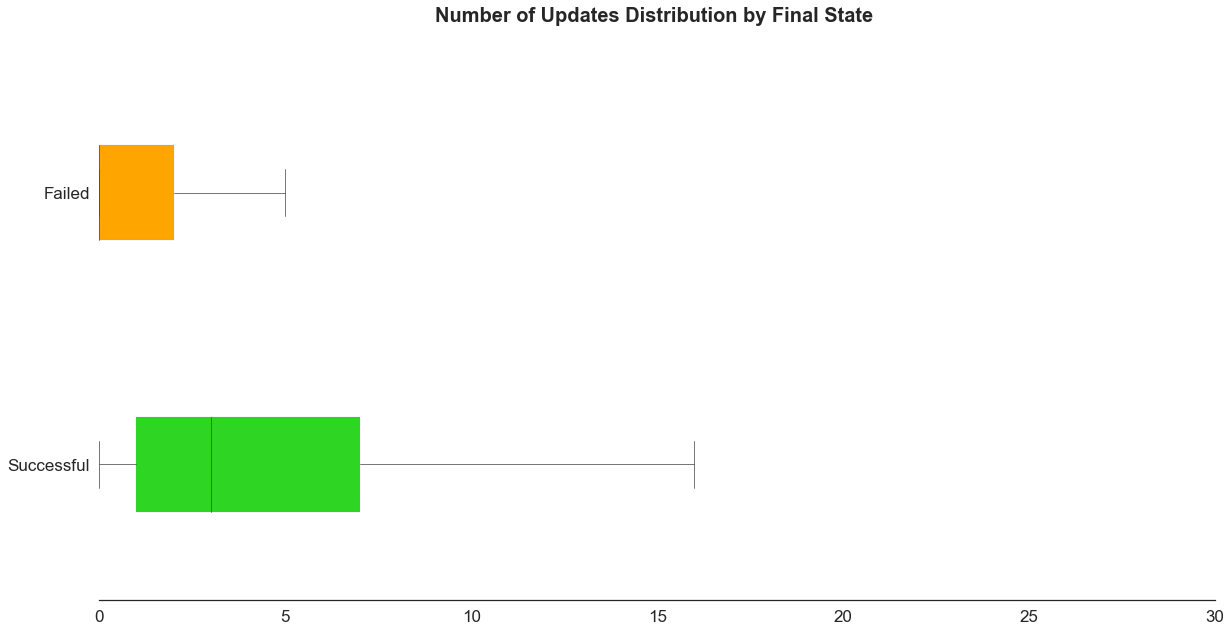

In [81]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left = True)
g = sns.boxplot(x="Updates", y= "State",data = df, width=0.35, linewidth=0.75, \
            fliersize=0)


g.axis(xmin=0, xmax=30)

failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 

succ.set_facecolor('#2ED623') 
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("");

plt.title("Number of Updates Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');

### 3. Number of Images and final state relationship

In [73]:
df['# Images'].describe()

count    12681.000000
mean         6.060642
std          9.136592
min          0.000000
25%          0.000000
50%          3.000000
75%          8.000000
max        111.000000
Name: # Images, dtype: float64

In [74]:
df['# Images'].value_counts().head()

0    4852
1     747
3     696
4     681
2     653
Name: # Images, dtype: int64

In [321]:
# 62% of projetcs has photos in its description
((12681-4852)/12681)*100

61.73803327813264

In [76]:
df[df['State'] == 'successful']['# Images'].describe()

count    6838.000000
mean        7.203568
std        10.125284
min         0.000000
25%         0.000000
50%         4.000000
75%        10.000000
max        94.000000
Name: # Images, dtype: float64

In [77]:
df[df['State'] == 'failed']['# Images'].describe()

count    5843.000000
mean        4.723087
std         7.608262
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max       111.000000
Name: # Images, dtype: float64

In [87]:
image_succ = df[df['State'] == 'successful']['# Images'].value_counts().to_frame().reset_index()
image_succ= image_succ.rename(columns = {'index':'Nb. Images','# Images':'Nb prj' })

image_succ['Nb. Images'].mean()

image_succ.describe()


,Nb. Images,Nb prj
count,74.000000,74.000000
mean,38.472973,92.405405
std,24.605503,276.283848
min,0.000000,1.000000
25%,18.250000,3.000000
50%,36.500000,13.000000
75%,56.750000,75.000000
max,94.000000,2272.000000


In [83]:
image_failed = df[df['State'] == 'failed']['# Images'].value_counts().to_frame().reset_index()
image_failed = image_failed.rename(columns = {'index':'Nb. Images','# Images':'Nb prj' })


image_failed

image_failed.describe()

,Nb. Images,Nb prj
count,62.000000,62.000000
mean,32.806452,94.241935
std,22.758057,333.573581
min,0.000000,1.000000
25%,15.250000,2.000000
50%,30.500000,7.500000
75%,45.750000,54.750000
max,111.000000,2580.000000


In [84]:
array_failed_i = np.array(image_failed.iloc[:,1])
array_failed_i

array([2580,  335,  327,  310,  306,  254,  245,  197,  165,  159,  123,
         97,   73,   71,   67,   56,   51,   50,   49,   44,   31,   27,
         25,   25,   25,   24,   16,   15,   10,    9,    8,    7,    6,
          5,    3,    3,    3,    3,    3,    3,    3,    3,    2,    2,
          2,    2,    2,    2,    2,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1])

In [88]:
array_succ_i = np.array(image_succ.iloc[:,1])

In [89]:
ind = image_succ.iloc[:,0]


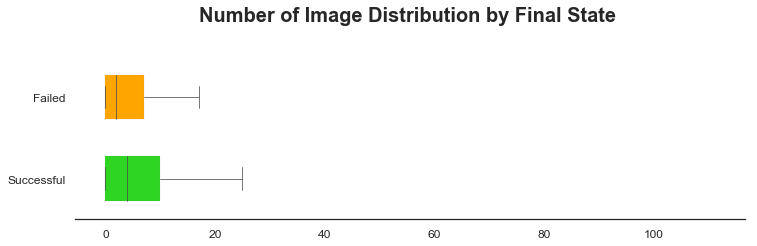

In [90]:
fig, ax = plt.subplots(figsize=(12,3))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left = True)
g = sns.boxplot(x="# Images", y= "State",data = df, width=0.55, linewidth=0.75, \
            fliersize=0)


failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 

succ.set_facecolor('#2ED623') 
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("");

plt.title("Number of Image Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');

## NETWORK factor Analysis

### 1.  Number of Comments and final state relationship

In [184]:
df['Comments'].describe()

count    12681.000000
mean        16.510685
std        176.539187
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max      10228.000000
Name: Comments, dtype: float64

In [84]:
df[df['State'] == 'successful']['Comments'].describe()

count     6838.000000
mean        29.286341
std        239.412564
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max      10228.000000
Name: Comments, dtype: float64

In [85]:
df[df['State'] == 'failed']['Comments'].describe()

count    5843.000000
mean        1.559473
std        12.259309
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       722.000000
Name: Comments, dtype: float64

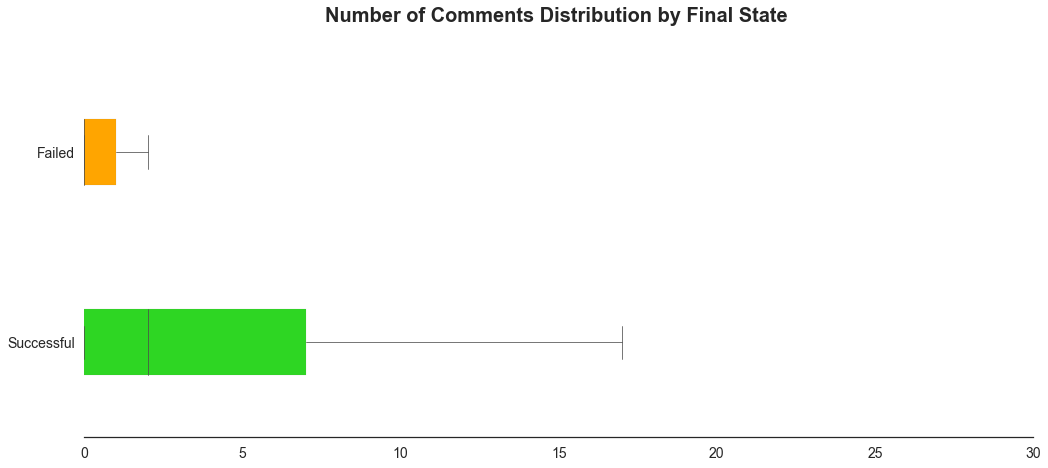

In [91]:
fig, ax = plt.subplots(figsize=(17,7))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left = True)
g = sns.boxplot(x="Comments", y= "State",data = df, width=0.35, linewidth=0.75, \
            fliersize=0)


failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 

succ.set_facecolor('#2ED623') 
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("")

g.axis(xmin=0, xmax= 30);
plt.title("Number of Comments Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');

### 2. Number of Shares and final State Relationship

In [87]:
df['Facebook Shares'].describe()

count     12681.000000
mean        303.241700
std        1236.343526
min           0.000000
25%          23.000000
50%         111.000000
75%         317.000000
max      111868.000000
Name: Facebook Shares, dtype: float64

In [88]:
df[df['State']== 'successful']['Facebook Shares'].describe()

count      6838.000000
mean        473.793653
std        1643.572174
min           0.000000
25%          95.000000
50%         235.500000
75%         505.000000
max      111868.000000
Name: Facebook Shares, dtype: float64

In [89]:
df[df['State']== 'failed']['Facebook Shares'].describe()

count     5843.000000
mean       103.646586
std        287.025931
min          0.000000
25%          5.000000
50%         31.000000
75%        110.000000
max      12529.000000
Name: Facebook Shares, dtype: float64

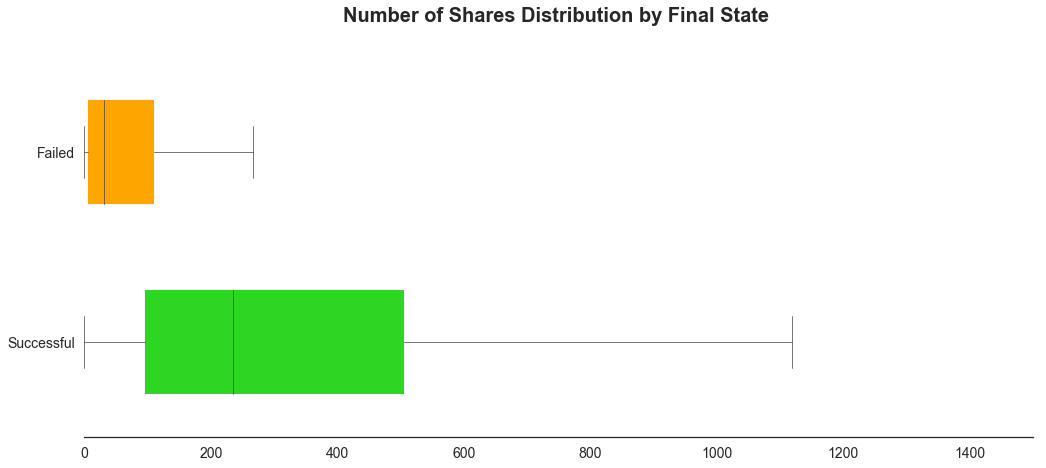

In [92]:
fig, ax = plt.subplots(figsize=(17,7))
sns.set(style='white')
sns.set_context("notebook")
sns.despine(left = True)
g = sns.boxplot(x="Facebook Shares", y= "State",data = df, width=0.55, linewidth=0.75, \
            fliersize=0)


failes = ax.artists[0]
succ = ax.artists[1]

failes.set_facecolor('#FFA500')
failes.set_edgecolor('grey')
failes.set_linewidth(0.1); 
 
succ.set_facecolor('#2ED623') 
succ.set_edgecolor('grey')
succ.set_linewidth(0.1)

labels = ['Failed', 'Successful']
g.set_yticklabels(labels)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

g.xaxis.set_label_text("")
g.yaxis.set_label_text("")

g.axis(xmin=0, xmax= 1500);

plt.title("Number of Shares Distribution by Final State ", fontsize=20,fontweight='bold',pad=35,\
        loc='center', horizontalalignment='center');